# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [162]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
# define output dataset 
y = np.array([[0,0,1,1]]).T

In [163]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1

# define syn1
syn1 = 2*np.random.random((4,1)) - 1

iter = 0

#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]
l1_error_history = []
l2_error_history = []


 * l1 =  x(4,3) dot syn0(3,4)  -> (4,4)
 * l2 = l1(4,4) dot syn1(4,1)   ->(4,1)

 

In [164]:
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [165]:
for iter in range(1000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    #先算出l2的誤差，再反向傳播
    l2_error = y - l2
    l2_delta = l2_error*nonlin(l2,deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * nonlin(l1,True)

    #l1_error = y - l1
  

    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    syn1 += np.dot(l1.T,l2_delta)
    
    l1_error_history.append(l1_error)
    l2_error_history.append(l2_error)
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)


Output After Training:
[[ 0.61210757  0.26068968  0.82645679  0.60195209]
 [ 0.49869476  0.17189637  0.82785085  0.53707288]
 [ 0.17038107  0.93152867  0.08076609  0.61144676]
 [ 0.11462657  0.88899855  0.08149298  0.54695037]]



[[ 0.01860094]
 [ 0.01514467]
 [ 0.98184927]
 [ 0.97979709]]


In [166]:
l1_error_history = np.array(l1_error_history)
l1_error_history = np.hstack(l1_error_history[:,0,0])
#l1_error_history = np.hstack(l1_error_history)
l1_error_history

array([ 0.0698116 ,  0.06958014,  0.06937461,  0.06922676,  0.06914938,
        0.06914234,  0.06919657,  0.06929687,  0.0694239 ,  0.06955574,
        0.06966927,  0.06974146,  0.06975052,  0.06967699,  0.06950462,
        0.06922105,  0.06881812,  0.06829201,  0.06764291,  0.06687463,
        0.06599393,  0.0650099 ,  0.06393326,  0.06277572,  0.0615495 ,
        0.06026686,  0.05893974,  0.05757955,  0.05619691,  0.0548016 ,
        0.05340241,  0.05200716,  0.05062267,  0.04925479,  0.04790847,
        0.04658777,  0.045296  ,  0.04403576,  0.04280899,  0.04161712,
        0.04046108,  0.03934137,  0.03825819,  0.03721141,  0.03620067,
        0.03522544,  0.03428501,  0.03337855,  0.03250515,  0.03166384,
        0.03085357,  0.03007331,  0.02932196,  0.02859846,  0.02790175,
        0.02723075,  0.02658445,  0.02596182,  0.02536188,  0.02478369,
        0.02422632,  0.02368888,  0.02317052,  0.02267042,  0.02218779,
        0.02172189,  0.02127198,  0.02083739,  0.02041746,  0.02

In [167]:
l2_error_history = np.array(l2_error_history)
l2_error_history = np.hstack(l2_error_history[:,0:1])
l2_error_history = np.hstack(l2_error_history)
l2_error_history

array([-0.47372957, -0.46312243, -0.45391844, -0.44577944, -0.43842086,
       -0.43160551, -0.42513743, -0.4188565 , -0.41263408, -0.40636956,
       -0.39998764, -0.39343607, -0.38668346, -0.37971711, -0.37254049,
       -0.36517054, -0.35763461, -0.34996744, -0.34220817, -0.3343977 ,
       -0.32657644, -0.3187827 , -0.31105148, -0.30341389, -0.29589682,
       -0.28852299, -0.28131108, -0.27427607, -0.26742955, -0.26078009,
       -0.25433358, -0.24809356, -0.24206158, -0.2362374 , -0.23061938,
       -0.22520461, -0.21998923, -0.21496856, -0.21013733, -0.20548977,
       -0.2010198 , -0.19672114, -0.19258736, -0.188612  , -0.18478864,
       -0.18111091, -0.17757257, -0.17416755, -0.17088992, -0.16773399,
       -0.16469423, -0.16176536, -0.15894231, -0.15622021, -0.15359443,
       -0.15106055, -0.14861436, -0.14625184, -0.14396918, -0.14176277,
       -0.13962916, -0.13756508, -0.13556744, -0.1336333 , -0.13175986,
       -0.12994448, -0.12818464, -0.12647798, -0.12482221, -0.12

In [168]:
print("Output After Training:")
print("\n")
print(l1)
print("\n\n")
print(l2)

Output After Training:


[[ 0.61210757  0.26068968  0.82645679  0.60195209]
 [ 0.49869476  0.17189637  0.82785085  0.53707288]
 [ 0.17038107  0.93152867  0.08076609  0.61144676]
 [ 0.11462657  0.88899855  0.08149298  0.54695037]]



[[ 0.01860094]
 [ 0.01514467]
 [ 0.98184927]
 [ 0.97979709]]


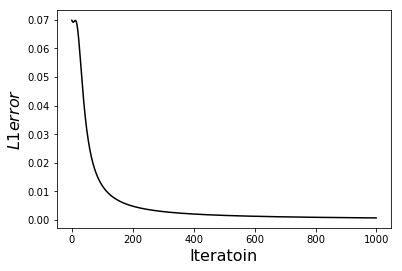

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(l1_error_history, ms=3, lw=1.5, color='black')
plt.xlabel(r'Iteratoin', fontsize=16)
plt.ylabel(r'$L1 error$', fontsize=16)
plt.show()

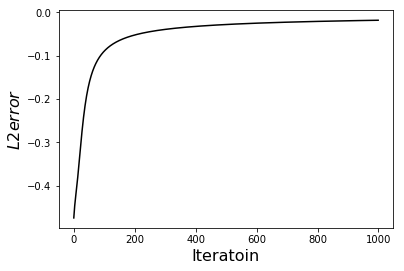

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(l2_error_history, ms=3, lw=1.5, color='black')
plt.xlabel(r'Iteratoin', fontsize=16)
plt.ylabel(r'$L2 error$', fontsize=16)
plt.show()